In [11]:
import pandas as pd

In [12]:
data = pd.read_csv("DATA/Standard_Scaler_result.csv",encoding="cp949")

In [13]:
data.head()

,CUSTNO,GNO,CBSCORE,CBSCOREGRD,CREDITOTAMT,YSALEAMT,ESTMM,ASSETAMT,IMSAAMT,IMJUAMT,...,환율,GDP,소상공인체감지수,실업률,물가지수,국고채,금리,유가등락률,소비자심리지수,ONEHOT
0,475821,l180202101898,1.483693,-1.008776,-0.182324,5.599410,-0.351065,-0.497246,-0.176818,-0.327516,...,-0.068090,2.274533,-1.302456,-0.290076,2.728294,-1.492204,-3.801670,2.712699,1.300530,3
1,74417,l230201700120,0.436620,-0.269293,-0.187359,3.004204,-0.774902,-0.434147,-0.395499,0.047573,...,0.509001,-1.236236,-1.058419,0.571922,-0.733929,-0.363940,-0.649856,1.705658,-1.167094,8
2,387787,l110201603233,0.682990,-1.008776,-0.283032,1.765241,1.889216,-0.497246,-0.176818,-0.327516,...,0.991659,-1.589789,0.853200,-0.290076,-1.872513,-0.546902,-0.649856,0.170943,-0.965339,7
3,395418,l230201700254,0.169719,-0.269293,-0.212536,1.647960,-0.744628,-0.497246,-0.176818,-0.327516,...,0.490639,-1.236236,1.219254,-0.721075,-0.788147,-0.241965,-0.649856,0.665173,-0.810142,3
4,190372,l200201601418,-3.033092,2.688638,-0.247784,0.478163,1.616749,-0.202785,-0.351763,-0.327516,...,0.409321,-1.809655,-0.102610,-0.721075,-2.530877,-1.736154,-0.649856,-0.958727,-0.142797,7


In [14]:
data.columns

Index(['CUSTNO', 'GNO', 'CBSCORE', 'CBSCOREGRD', 'CREDITOTAMT', 'YSALEAMT',
       'ESTMM', 'ASSETAMT', 'IMSAAMT', 'IMJUAMT', 'BUSAAMT', 'BUJUAMT',
       'BU1TOTAMT', 'GAMT', 'GKIND', 'BIZNML_x', 'LABORCNT', 'ACTCD', 'ACTKND',
       'KOSPI', '환율', 'GDP', '소상공인체감지수', '실업률', '물가지수', '국고채', '금리', '유가등락률',
       '소비자심리지수', 'ONEHOT'],
      dtype='object')

In [15]:
features = data[[ 'CBSCORE', 'CREDITOTAMT', 'YSALEAMT',
       'ESTMM', 'IMSAAMT', 'IMJUAMT',  'BUJUAMT',
       'BU1TOTAMT', 'GAMT', 'KOSPI', '환율', 'GDP', 
       '실업률', '물가지수', '국고채', '금리', '유가등락률',
       '소비자심리지수','ONEHOT']] #GKIND 갖고 가나요?.. 아뇨..ㅋㅋㅋ
act = data['ACTCD'] 

#BorderlineSMOTE 기법 활용

In [6]:
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.model_selection import train_test_split

In [7]:

train_x, test_x,train_y, test_y = train_test_split(features, act,
stratify=act,train_size=0.7,test_size=0.3,random_state=1)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(27381, 19) (11736, 19) (27381,) (11736,)


In [8]:
sm = BorderlineSMOTE(random_state=42)
over_train_x, over_train_y = sm.fit_resample(train_x,train_y)
'''
over_train_x : 학습용 독립변수
over_train_y : 학습용 종속변수
'''

'\nover_train_x : 학습용 독립변수\nover_train_y : 학습용 종속변수\n'

In [9]:
from sklearn.neighbors import KNeighborsClassifier

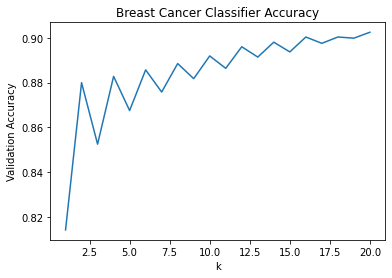

0.9024369461486026


In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
k = range(1,21)
accuracies = []
matrix_kd_tree_uniform_BOST = []
for i in k:
    KNC = KNeighborsClassifier(n_neighbors= i,algorithm='kd_tree',weights='uniform')
    KNC.fit(over_train_x,over_train_y)
    pred_y = KNC.predict(test_x)
    pr = precision_score(y_true=test_y,y_pred=pred_y)
    r = recall_score(y_true=test_y,y_pred=pred_y)
    f1 = f1_score(y_true=test_y,y_pred=pred_y)
    rca = roc_auc_score(y_true=test_y,y_score=pred_y)
    accuracies.append(KNC.score(test_x, test_y))
    cfm = confusion_matrix(y_true=test_y,y_pred=pred_y)
    matrix_kd_tree_uniform_BOST.append((i,pr,r,f1,rca,KNC.score(test_x, test_y),cfm))
plt.plot(k, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()    
print(max(accuracies))

In [23]:
matrix_kd_tree_uniform_BOST

[(1,
  0.22767419038272815,
  0.4336448598130841,
  0.2985842985842986,
  0.643036568290191,
  0.8142467620995228,
  array([[9092, 1574],
         [ 606,  464]], dtype=int64)),
 (2,
  0.30128956623681125,
  0.24018691588785046,
  0.2672906916276651,
  0.5921542117410376,
  0.8799420586230402,
  array([[10070,   596],
         [  813,   257]], dtype=int64)),
 (3,
  0.25608856088560883,
  0.32429906542056075,
  0.2861855670103092,
  0.6148965794006986,
  0.8525051124744376,
  array([[9658, 1008],
         [ 723,  347]], dtype=int64)),
 (4,
  0.3023255813953488,
  0.21869158878504674,
  0.25379609544468545,
  0.5840317122623903,
  0.8827539195637355,
  array([[10126,   540],
         [  836,   234]], dtype=int64)),
 (5,
  0.27230046948356806,
  0.27102803738317754,
  0.2716627634660421,
  0.5991836230418606,
  0.8675017041581459,
  array([[9891,  775],
         [ 780,  290]], dtype=int64)),
 (6,
  0.29393939393939394,
  0.18130841121495328,
  0.22427745664739887,
  0.5688090902877692,
  0

In [24]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix, classification_report

KNC = KNeighborsClassifier(n_neighbors= 2,algorithm='kd_tree',weights='distance')
KNC.fit(over_train_x,over_train_y)
pred_y = KNC.predict(test_x)
print(classification_report(test_y, pred_y, target_names=['사고보증', '정상보증']))

              precision    recall  f1-score   support

        사고보증       0.94      0.85      0.89     10666
        정상보증       0.23      0.43      0.30      1070

    accuracy                           0.81     11736
   macro avg       0.58      0.64      0.60     11736
weighted avg       0.87      0.81      0.84     11736



In [25]:
from imblearn.under_sampling import EditedNearestNeighbours

In [26]:
enn = EditedNearestNeighbours()
over_train_x,over_train_y = enn.fit_resample(train_x,train_y)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

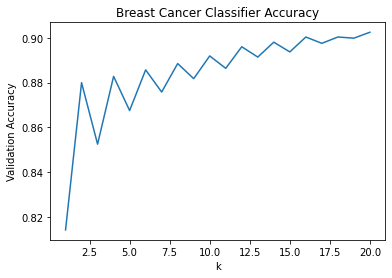

0.9024369461486026


In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
k = range(1,21)
accuracies = []
matrix_kd_tree_uniform_ENN = []
for i in k:
    KNC = KNeighborsClassifier(n_neighbors= i,algorithm='kd_tree',weights='uniform')
    KNC.fit(over_train_x,over_train_y)
    pred_y = KNC.predict(test_x)
    pr = precision_score(y_true=test_y,y_pred=pred_y)
    r = recall_score(y_true=test_y,y_pred=pred_y)
    f1 = f1_score(y_true=test_y,y_pred=pred_y)
    rca = roc_auc_score(y_true=test_y,y_score=pred_y)
    cfm = confusion_matrix(y_true=test_y,y_pred=pred_y)
    accuracies.append(KNC.score(test_x, test_y))
    matrix_kd_tree_uniform_ENN.append((i,pr,r,f1,rca,KNC.score(test_x, test_y),cfm))
plt.plot(k, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()    
print(max(accuracies))

In [29]:
matrix_kd_tree_uniform_ENN

[(1,
  0.22767419038272815,
  0.4336448598130841,
  0.2985842985842986,
  0.643036568290191,
  0.8142467620995228,
  array([[9092, 1574],
         [ 606,  464]], dtype=int64)),
 (2,
  0.30128956623681125,
  0.24018691588785046,
  0.2672906916276651,
  0.5921542117410376,
  0.8799420586230402,
  array([[10070,   596],
         [  813,   257]], dtype=int64)),
 (3,
  0.25608856088560883,
  0.32429906542056075,
  0.2861855670103092,
  0.6148965794006986,
  0.8525051124744376,
  array([[9658, 1008],
         [ 723,  347]], dtype=int64)),
 (4,
  0.3023255813953488,
  0.21869158878504674,
  0.25379609544468545,
  0.5840317122623903,
  0.8827539195637355,
  array([[10126,   540],
         [  836,   234]], dtype=int64)),
 (5,
  0.27230046948356806,
  0.27102803738317754,
  0.2716627634660421,
  0.5991836230418606,
  0.8675017041581459,
  array([[9891,  775],
         [ 780,  290]], dtype=int64)),
 (6,
  0.29393939393939394,
  0.18130841121495328,
  0.22427745664739887,
  0.5688090902877692,
  0

In [30]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix, classification_report

KNC = KNeighborsClassifier(n_neighbors= 2,algorithm='kd_tree',weights='distance')
KNC.fit(over_train_x,over_train_y)
pred_y = KNC.predict(test_x)
print(classification_report(test_y, pred_y, target_names=['사고보증', '정상보증']))

              precision    recall  f1-score   support

        사고보증       0.94      0.85      0.89     10666
        정상보증       0.23      0.43      0.30      1070

    accuracy                           0.81     11736
   macro avg       0.58      0.64      0.60     11736
weighted avg       0.87      0.81      0.84     11736



In [31]:
from imblearn.over_sampling import ADASYN


In [32]:
ADA = ADASYN(random_state=42,)
over_train_x,over_train_y = ADA.fit_resample(train_x,train_y)
from sklearn.neighbors import KNeighborsClassifier

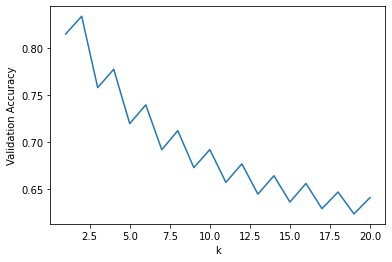

0.8340149965916837


In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
k = range(1,21)
accuracies = []
matrix_kd_tree_uniform_ADA = []
for i in k:
    KNC = KNeighborsClassifier(n_neighbors= i,algorithm='kd_tree',weights='uniform')
    KNC.fit(over_train_x,over_train_y)
    pred_y = KNC.predict(test_x)
    pr = precision_score(y_true=test_y,y_pred=pred_y)
    r = recall_score(y_true=test_y,y_pred=pred_y)
    f1 = f1_score(y_true=test_y,y_pred=pred_y)
    rca = roc_auc_score(y_true=test_y,y_score=pred_y)
    cfm = confusion_matrix(y_true=test_y,y_pred=pred_y)
    accuracies.append(KNC.score(test_x, test_y))
    matrix_kd_tree_uniform_ADA.append((i,pr,r,f1,rca,KNC.score(test_x, test_y),cfm))
plt.plot(k, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.show()    
print(max(accuracies))

In [35]:
matrix_kd_tree_uniform_ADA

[(1,
  0.22389558232931728,
  0.41682242990654206,
  0.2913128674069236,
  0.6359379353732973,
  0.8150988411724608,
  array([[9120, 1546],
         [ 624,  446]], dtype=int64)),
 (2,
  0.23962040332147094,
  0.3775700934579439,
  0.29317851959361396,
  0.6286875406348411,
  0.8340149965916837,
  array([[9384, 1282],
         [ 666,  404]], dtype=int64)),
 (3,
  0.18895144264602393,
  0.5018691588785047,
  0.2745398773006135,
  0.6428809510874802,
  0.7581799591002045,
  array([[8361, 2305],
         [ 533,  537]], dtype=int64)),
 (4,
  0.19596997234294744,
  0.4635514018691589,
  0.2754790336017773,
  0.636379113647874,
  0.777692569870484,
  array([[8631, 2035],
         [ 574,  496]], dtype=int64)),
 (5,
  0.1731052786788558,
  0.5485981308411215,
  0.26316969289396996,
  0.642853350063351,
  0.7199216087252897,
  array([[7862, 2804],
         [ 483,  587]], dtype=int64)),
 (6,
  0.17943743937924345,
  0.5186915887850467,
  0.266634638481864,
  0.6403696083808976,
  0.73986025903203

In [36]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix, classification_report

KNC = KNeighborsClassifier(n_neighbors= 2,algorithm='kd_tree',weights='distance')
KNC.fit(over_train_x,over_train_y)
pred_y = KNC.predict(test_x)
print(classification_report(test_y, pred_y, target_names=['사고보증', '정상보증']))

              precision    recall  f1-score   support

        사고보증       0.94      0.86      0.89     10666
        정상보증       0.22      0.41      0.29      1070

    accuracy                           0.82     11736
   macro avg       0.58      0.63      0.59     11736
weighted avg       0.87      0.82      0.84     11736



In [37]:
from imblearn.combine import SMOTEENN

SMT = SMOTEENN(random_state=42)
over_train_x,over_train_y = SMT.fit_resample(train_x,train_y)

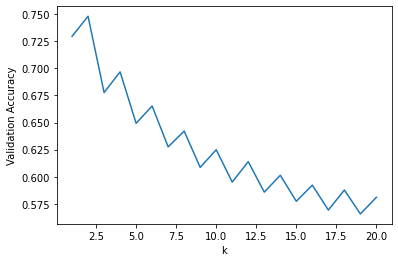

0.7482106339468303


In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
k = range(1,21)
accuracies = []
matrix_kd_tree_uniform_SMTEN = []
for i in k:
    KNC = KNeighborsClassifier(n_neighbors= i,algorithm='kd_tree',weights='uniform')
    KNC.fit(over_train_x,over_train_y)
    pred_y = KNC.predict(test_x)
    pr = precision_score(y_true=test_y,y_pred=pred_y)
    r = recall_score(y_true=test_y,y_pred=pred_y)
    f1 = f1_score(y_true=test_y,y_pred=pred_y)
    rca = roc_auc_score(y_true=test_y,y_score=pred_y)
    cfm = confusion_matrix(y_true=test_y,y_pred=pred_y)
    accuracies.append(KNC.score(test_x, test_y))
    matrix_kd_tree_uniform_SMTEN.append((i,pr,r,f1,rca,KNC.score(test_x, test_y),cfm))
plt.plot(k, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.show()    
print(max(accuracies))

In [39]:
matrix_kd_tree_uniform_SMTEN

[(1,
  0.1845184518451845,
  0.5747663551401869,
  0.27935498523733815,
  0.6599689641817567,
  0.7296353101567825,
  array([[7948, 2718],
         [ 455,  615]], dtype=int64)),
 (2,
  0.19329645297754638,
  0.5551401869158878,
  0.28674873280231716,
  0.6613597053086846,
  0.7482106339468303,
  array([[8187, 2479],
         [ 476,  594]], dtype=int64)),
 (3,
  0.16845965770171148,
  0.6439252336448598,
  0.26705426356589146,
  0.6625307773324618,
  0.6777436946148603,
  array([[7265, 3401],
         [ 381,  689]], dtype=int64)),
 (4,
  0.17468619246861924,
  0.6242990654205608,
  0.2729873314262362,
  0.6642027860386134,
  0.6968302658486708,
  array([[7510, 3156],
         [ 402,  668]], dtype=int64)),
 (5,
  0.16275465013286095,
  0.6869158878504673,
  0.2631578947368421,
  0.6662124910844311,
  0.6492842535787321,
  array([[6885, 3781],
         [ 335,  735]], dtype=int64)),
 (6,
  0.1661214953271028,
  0.6644859813084112,
  0.26579439252336445,
  0.6649356589459738,
  0.6653033401

In [40]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix, classification_report

KNC = KNeighborsClassifier(n_neighbors= 2,algorithm='kd_tree',weights='distance')
KNC.fit(over_train_x,over_train_y)
pred_y = KNC.predict(test_x)
print(classification_report(test_y, pred_y, target_names=['사고보증', '정상보증']))

              precision    recall  f1-score   support

        사고보증       0.95      0.75      0.83     10666
        정상보증       0.18      0.57      0.28      1070

    accuracy                           0.73     11736
   macro avg       0.57      0.66      0.56     11736
weighted avg       0.88      0.73      0.78     11736



In [41]:
from imblearn.combine import SMOTETomek

SMT = SMOTETomek(random_state=42)
over_train_x,over_train_y = SMT.fit_resample(train_x,train_y)

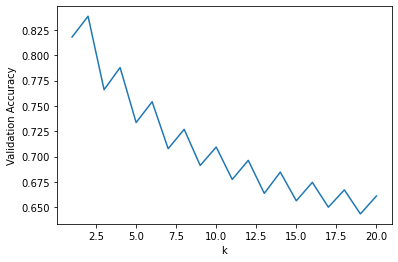

0.8384458077709611


In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
k = range(1,21)
accuracies = []
matrix_kd_tree_uniform_SMTTK = []
for i in k:
    KNC = KNeighborsClassifier(n_neighbors= i,algorithm='kd_tree',weights='uniform')
    KNC.fit(over_train_x,over_train_y)
    pred_y = KNC.predict(test_x)
    pr = precision_score(y_true=test_y,y_pred=pred_y)
    r = recall_score(y_true=test_y,y_pred=pred_y)
    f1 = f1_score(y_true=test_y,y_pred=pred_y)
    rca = roc_auc_score(y_true=test_y,y_score=pred_y)
    cfm = confusion_matrix(y_true=test_y,y_pred=pred_y)
    accuracies.append(KNC.score(test_x, test_y))
    matrix_kd_tree_uniform_SMTTK.append((i,pr,r,f1,rca,KNC.score(test_x, test_y),cfm))
plt.plot(k, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.show()    
print(max(accuracies))

In [43]:
matrix_kd_tree_uniform_SMTTK

[(1,
  0.22457408363448633,
  0.40654205607476634,
  0.2893249085467243,
  0.6328603773717166,
  0.8179107021131561,
  array([[9164, 1502],
         [ 635,  435]], dtype=int64)),
 (2,
  0.24662576687116564,
  0.37570093457943926,
  0.2977777777777778,
  0.6302843694086021,
  0.8384458077709611,
  array([[9438, 1228],
         [ 668,  402]], dtype=int64)),
 (3,
  0.1950509461426492,
  0.5009345794392523,
  0.28077527501309585,
  0.6467733088458216,
  0.7660190865712339,
  array([[8454, 2212],
         [ 534,  536]], dtype=int64)),
 (4,
  0.20636889991728702,
  0.4663551401869159,
  0.28612385321100914,
  0.6432188226717441,
  0.7878323108384458,
  array([[8747, 1919],
         [ 571,  499]], dtype=int64)),
 (5,
  0.18114143920595532,
  0.5457943925233645,
  0.272007452258966,
  0.6491394614032535,
  0.733640081799591,
  array([[8026, 2640],
         [ 486,  584]], dtype=int64)),
 (6,
  0.19136641740312713,
  0.5261682242990654,
  0.2806580259222333,
  0.651561516987335,
  0.754089979550

In [44]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix, classification_report

KNC = KNeighborsClassifier(n_neighbors= 2,algorithm='kd_tree',weights='distance')
KNC.fit(over_train_x,over_train_y)
pred_y = KNC.predict(test_x)
print(classification_report(test_y, pred_y, target_names=['사고보증', '정상보증']))

              precision    recall  f1-score   support

        사고보증       0.94      0.86      0.90     10666
        정상보증       0.22      0.40      0.29      1070

    accuracy                           0.82     11736
   macro avg       0.58      0.63      0.59     11736
weighted avg       0.87      0.82      0.84     11736



In [46]:
from imblearn.under_sampling import TomekLinks

SMT = TomekLinks()
over_train_x,over_train_y = SMT.fit_resample(train_x,train_y)

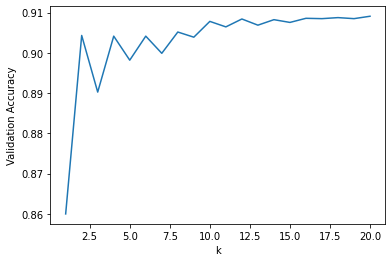

0.9090831629175188


In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
k = range(1,21)
accuracies = []
matrix_kd_tree_uniform_TK = []
for i in k:
    KNC = KNeighborsClassifier(n_neighbors= i,algorithm='kd_tree',weights='uniform')
    KNC.fit(over_train_x,over_train_y)
    pred_y = KNC.predict(test_x)
    pr = precision_score(y_true=test_y,y_pred=pred_y)
    r = recall_score(y_true=test_y,y_pred=pred_y)
    f1 = f1_score(y_true=test_y,y_pred=pred_y)
    rca = roc_auc_score(y_true=test_y,y_score=pred_y)
    cfm = confusion_matrix(y_true=test_y,y_pred=pred_y)
    accuracies.append(KNC.score(test_x, test_y))
    matrix_kd_tree_uniform_TK.append((i,pr,r,f1,rca,KNC.score(test_x, test_y),cfm))
plt.plot(k, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.show()    
print(max(accuracies))

In [48]:
matrix_kd_tree_uniform_TK

[(1,
  0.2759968725566849,
  0.3299065420560748,
  0.3005534269902086,
  0.6215443079678461,
  0.8600034083162917,
  array([[9740,  926],
         [ 717,  353]], dtype=int64)),
 (2,
  0.42318840579710143,
  0.13644859813084112,
  0.20636042402826854,
  0.5588955910211678,
  0.9043115201090661,
  array([[10467,   199],
         [  924,   146]], dtype=int64)),
 (3,
  0.3358433734939759,
  0.20841121495327103,
  0.25720876585928487,
  0.5835324404036936,
  0.8902522154055896,
  array([[10225,   441],
         [  847,   223]], dtype=int64)),
 (4,
  0.40350877192982454,
  0.10747663551401869,
  0.16974169741697417,
  0.5457690696790045,
  0.9041411042944786,
  array([[10496,   170],
         [  955,   115]], dtype=int64)),
 (5,
  0.36616702355460384,
  0.15981308411214953,
  0.2225113858165257,
  0.5660306748143722,
  0.8981765507839128,
  array([[10370,   296],
         [  899,   171]], dtype=int64)),
 (6,
  0.36585365853658536,
  0.07009345794392523,
  0.1176470588235294,
  0.528952598088

In [49]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix, classification_report

KNC = KNeighborsClassifier(n_neighbors= 2,algorithm='kd_tree',weights='distance')
KNC.fit(over_train_x,over_train_y)
pred_y = KNC.predict(test_x)
print(classification_report(test_y, pred_y, target_names=['사고보증', '정상보증']))

              precision    recall  f1-score   support

        사고보증       0.93      0.91      0.92     10666
        정상보증       0.27      0.32      0.30      1070

    accuracy                           0.86     11736
   macro avg       0.60      0.62      0.61     11736
weighted avg       0.87      0.86      0.87     11736



In [45]:
sorted(matrix_kd_tree_uniform_BOST,key=lambda x: x[3])

[(18,
  0.34662576687116564,
  0.10560747663551402,
  0.16189111747851004,
  0.5428187392553155,
  0.9003067484662577,
  array([[10453,   213],
         [  957,   113]], dtype=int64)),
 (20,
  0.3754152823920266,
  0.10560747663551402,
  0.1648431801604668,
  0.543990687502081,
  0.9024369461486026,
  array([[10478,   188],
         [  957,   113]], dtype=int64)),
 (14,
  0.3333333333333333,
  0.11869158878504672,
  0.17505168849069605,
  0.5474388002053867,
  0.8980061349693251,
  array([[10412,   254],
         [  943,   127]], dtype=int64)),
 (16,
  0.3595505617977528,
  0.11962616822429907,
  0.17952314165497896,
  0.5491249161016489,
  0.9003067484662577,
  array([[10438,   228],
         [  942,   128]], dtype=int64)),
 (12,
  0.32235294117647056,
  0.1280373831775701,
  0.18327759197324414,
  0.5505178477860473,
  0.8959611451942741,
  array([[10378,   288],
         [  933,   137]], dtype=int64)),
 (15,
  0.3081896551724138,
  0.1336448598130841,
  0.1864406779661017,
  0.55177

In [61]:
sorted(matrix_kd_tree_uniform_ENN,key=lambda x: x[3])

[(20,
  0.3408360128617363,
  0.09906542056074766,
  0.15351194786386677,
  0.5399227346568974,
  0.9003919563735515,
  array([[10461,   205],
         [  964,   106]], dtype=int64)),
 (18,
  0.3373860182370821,
  0.10373831775700934,
  0.15868477483917084,
  0.5416497701667101,
  0.8997102931152011,
  array([[10448,   218],
         [  959,   111]], dtype=int64)),
 (16,
  0.33618233618233617,
  0.1102803738317757,
  0.1660802251935257,
  0.5442176292560341,
  0.8990286298568507,
  array([[10433,   233],
         [  952,   118]], dtype=int64)),
 (19,
  0.32997481108312343,
  0.12242990654205607,
  0.17859577368779822,
  0.5487454239254439,
  0.8973244717109747,
  array([[10400,   266],
         [  939,   131]], dtype=int64)),
 (14,
  0.3308270676691729,
  0.1233644859813084,
  0.179714091218516,
  0.5491658357151994,
  0.8973244717109747,
  array([[10399,   267],
         [  938,   132]], dtype=int64)),
 (17,
  0.31336405529953915,
  0.12710280373831775,
  0.18085106382978722,
  0.5495

In [62]:
sorted(matrix_kd_tree_uniform_ADA,key=lambda x: x[3])

[(17,
  0.15356265356265356,
  0.7009345794392523,
  0.25193147463889826,
  0.6566739276344958,
  0.6204839809134287,
  array([[6532, 4134],
         [ 320,  750]], dtype=int64)),
 (19,
  0.15316760224538895,
  0.7140186915887851,
  0.25222845823704193,
  0.6589969700209066,
  0.6140081799591002,
  array([[6442, 4224],
         [ 306,  764]], dtype=int64)),
 (15,
  0.15657311669128507,
  0.6934579439252336,
  0.2554656567395421,
  0.659357886269761,
  0.6314758009543285,
  array([[6669, 3997],
         [ 328,  742]], dtype=int64)),
 (11,
  0.15961800818553887,
  0.6560747663551402,
  0.25676664228237017,
  0.65477655437577,
  0.6537150647580096,
  array([[6970, 3696],
         [ 368,  702]], dtype=int64)),
 (20,
  0.15790589232725732,
  0.6962616822429907,
  0.25742916378714586,
  0.6618848257455344,
  0.6337764144512611,
  array([[6693, 3973],
         [ 325,  745]], dtype=int64)),
 (18,
  0.15864759427828348,
  0.6841121495327103,
  0.25756509500351865,
  0.6600759510086203,
  0.6404

In [63]:
sorted(matrix_kd_tree_uniform_SMTEN,key=lambda x: x[3])

[(19,
  0.14167650531286896,
  0.7850467289719626,
  0.24003429061294473,
  0.6539615793744119,
  0.5467791411042945,
  array([[5577, 5089],
         [ 230,  840]], dtype=int64)),
 (15,
  0.14238468233246301,
  0.7644859813084112,
  0.24005869405722668,
  0.651275430181676,
  0.5587082481254261,
  array([[5739, 4927],
         [ 252,  818]], dtype=int64)),
 (17,
  0.14219712525667352,
  0.7766355140186916,
  0.240381833960081,
  0.6533186945679432,
  0.5524880708929789,
  array([[5653, 5013],
         [ 239,  831]], dtype=int64)),
 (18,
  0.14416961130742048,
  0.7626168224299066,
  0.24249628528974737,
  0.654231718921685,
  0.5656100886162236,
  array([[5822, 4844],
         [ 254,  816]], dtype=int64)),
 (13,
  0.14479799785484448,
  0.7570093457943925,
  0.24309723889555823,
  0.6542406563961649,
  0.5702113156100886,
  array([[5882, 4784],
         [ 260,  810]], dtype=int64)),
 (16,
  0.14501619287513495,
  0.7532710280373832,
  0.24321062160531082,
  0.6538715912735201,
  0.5725

In [64]:
sorted(matrix_kd_tree_uniform_SMTTK,key=lambda x: x[3])

[(19,
  0.15573241557324155,
  0.6766355140186916,
  0.2531911173282042,
  0.6543218822671745,
  0.6360770279481935,
  array([[6741, 3925],
         [ 346,  724]], dtype=int64)),
 (17,
  0.15680279537016817,
  0.6710280373831776,
  0.2542042839440609,
  0.6545183314611369,
  0.6410190865712339,
  array([[6805, 3861],
         [ 352,  718]], dtype=int64)),
 (20,
  0.15821777676744714,
  0.6504672897196262,
  0.2545255074053758,
  0.6516446705489186,
  0.6526073619631901,
  array([[6963, 3703],
         [ 374,  696]], dtype=int64)),
 (15,
  0.1584711667411712,
  0.6626168224299065,
  0.25577200577200576,
  0.6548130052520805,
  0.6484321745057942,
  array([[6901, 3765],
         [ 361,  709]], dtype=int64)),
 (18,
  0.16028763627928555,
  0.6457943925233645,
  0.2568295855788887,
  0.653199090130049,
  0.6592535787321063,
  array([[7046, 3620],
         [ 379,  691]], dtype=int64)),
 (13,
  0.16045977011494253,
  0.6523364485981309,
  0.25756457564575647,
  0.6549700244115725,
  0.657123